# Engr421 
## Homework 7
##  Linear Discriminant Analysis
### Ata Sayın, 64437

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd
import scipy.spatial as spa

In [2]:
# read data into memory
X_train = np.genfromtxt("hw07_training_images.csv", delimiter = ",")
y_train = np.genfromtxt("hw07_training_labels.csv", delimiter = ",").astype(int)
X_test = np.genfromtxt("hw07_test_images.csv", delimiter = ",")
y_test = np.genfromtxt("hw07_test_labels.csv", delimiter = ",").astype(int)

N=X_train.shape[0]
# get number of classes and number of features
C = np.max(y_train)
D = X_train.shape[1]

In [3]:
#sample means
sample_means=np.array([np.mean(X_train[y_train==c+1],axis=0) for c in range(C)])
sample_means.shape

(3, 784)

In [4]:
#sample covariance
sample_covariance=np.array([np.cov(np.transpose(X_train[y_train==c+1])) for c in range(C)])
sample_covariance.shape

(3, 784, 784)

In [5]:
#Within class matrix
Sw=np.sum(sample_covariance,axis=0)+np.diag(np.repeat(1e-10,D))
Sw.shape

(784, 784)

In [6]:
#total sample of the whole data
total_sample=np.array(np.mean(X_train,axis=0))
total_sample.shape

(784,)

In [7]:
#between class scatter matrix 
Y=np.zeros((y_train.shape[0], C)).astype(int)
Y[range(y_train.shape[0]), y_train-1] = 1

In [8]:
Sb=np.sum([np.dot((sample_means[c]-total_sample).reshape(784,1),((sample_means[c]-total_sample).reshape(784,1)).T
                )*np.sum(Y,axis=0)[c] for c in range(C)]
         ,axis=0)
Sb.shape

(784, 784)

In [9]:
J=np.linalg.inv(Sw).dot(Sb)

In [10]:
w,v=linalg.eigh(J)
v=np.real(v)
w=np.real(w)

In [11]:
#First largest
v1=v[:, np.argsort(-w)[0]]
v1

array([-4.22806322e-06, -1.38922034e-05, -9.58750267e-05, -3.56276681e-04,
       -2.08554425e-04, -2.79576710e-04, -1.76528120e-04, -1.34596804e-03,
       -4.54513658e-03, -5.01330619e-04,  2.25021302e-02,  2.22539174e-02,
        2.33950658e-02,  2.93211500e-02,  2.76579731e-02,  2.63488966e-02,
        1.54587409e-02,  1.95606227e-02,  2.01551975e-02, -9.38413612e-04,
       -2.37563399e-03, -2.48659590e-04, -6.04893752e-05, -1.13711441e-04,
       -2.54777681e-04, -1.79689834e-04, -2.96456829e-04, -1.49482018e-04,
       -7.09755427e-04, -1.63054284e-05, -4.25286989e-04, -9.58724294e-04,
       -8.24963695e-04, -3.39932754e-03, -1.45723637e-02, -3.07472605e-02,
       -4.22384393e-02, -2.75779434e-02,  1.48592221e-02,  1.35278460e-02,
        9.89710878e-03,  1.30831092e-02,  1.35690309e-02,  7.88963523e-03,
        3.60251103e-03,  1.14534750e-02,  8.44873966e-03, -3.35499782e-02,
       -4.08238607e-02, -2.34966952e-02, -6.93669133e-03, -1.47975318e-03,
       -1.02897955e-03, -

In [12]:
#Second largest
v2=v[:, np.argsort(-w)[1]]
v2

array([ 2.30524666e-06,  7.57437344e-06,  4.65928144e-05,  2.05174592e-04,
        2.06736227e-04,  9.42331323e-05,  1.91926251e-04,  2.21078517e-03,
        6.71420297e-03,  1.39557453e-02,  5.13532135e-02,  6.22635328e-02,
        6.29248526e-02,  6.95881736e-02,  6.92722970e-02,  6.29048609e-02,
        5.35129598e-02,  5.61503322e-02,  5.83879521e-02,  1.80015888e-02,
        4.98808593e-03,  1.16029468e-03,  5.23554732e-04,  7.32276153e-04,
       -7.49494107e-04, -7.85802544e-04, -2.33454246e-03, -1.05203980e-03,
       -6.47589623e-03,  3.54420528e-05, -5.29406871e-04,  8.72228918e-04,
        5.14945410e-04,  1.56370997e-03,  7.26223893e-03,  1.09417224e-02,
       -1.13465762e-02, -1.18672091e-02,  5.70603905e-02,  6.29323099e-02,
        5.60796064e-02,  6.49430778e-02,  6.72273606e-02,  5.87227516e-02,
        5.66591862e-02,  6.06548217e-02,  5.45397317e-02,  4.07077706e-03,
        1.15315661e-02,  1.17780851e-02,  3.20287118e-03,  4.15837915e-04,
       -8.99173930e-05,  

In [13]:
W=np.transpose(np.vstack((v1,v2)))
W.shape

(784, 2)

In [14]:
Z_train=np.matmul(W.T,X_train.T)
Z_train.shape

(2, 3000)

## Plot

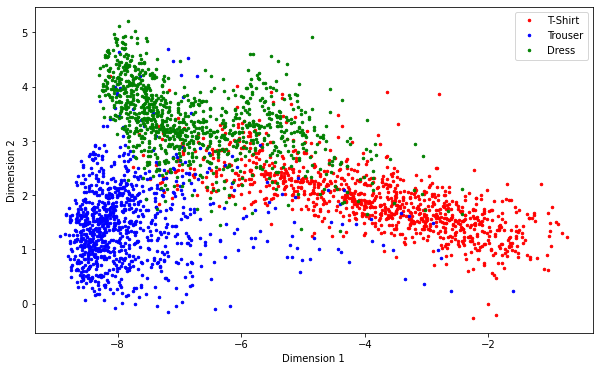

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(Z_train[0][y_train==1],Z_train[1][y_train==1],"r.", markersize = 5,label="T-Shirt")
plt.plot(Z_train[0][y_train==2],Z_train[1][y_train==2],"b.", markersize = 5,label="Trouser")
plt.plot(Z_train[0][y_train==3],Z_train[1][y_train==3],"g.", markersize = 5,label="Dress")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [16]:
c1=X_train[y_train==+1].reshape(1012,28,28)[0]
c2=X_train[y_train==+2].reshape(974,28,28)[0]
c3=X_train[y_train==+3].reshape(1014,28,28)[0]

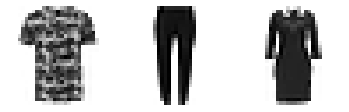

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(c1,cmap='binary_r')
ax1.axis('off')
ax2.imshow(c2,cmap='binary_r')
ax2.axis('off')
ax3.imshow(c3,cmap='binary_r')
ax3.axis('off')
plt.show()

## Five-nearest Neighboor Classifier

In [18]:
K=5

In [19]:
#Train data
Dis = spa.distance_matrix(Z_train.T,Z_train.T)
Dis[np.argsort(Dis)[:,K]]

k_distances=[]
k_distances=np.vstack([y_train[np.argsort(Dis)[:,k+1]] for k in range(K)])    

p_hat=np.array([np.sum(np.array(k_distances==c+1),axis=0) for c in range(C)])/K
print(p_hat)

[[0.8 0.  1.  ... 0.  1.  1. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.2 1.  0.  ... 1.  0.  0. ]]


In [20]:
y_predicted = np.argmax(p_hat, axis = 0) + 1
confusion_matrix = pd.crosstab(y_predicted, y_train, rownames = ['y_pred'], colnames = ['y_train'])
print(confusion_matrix)

y_train    1    2    3
y_pred                
1        876   51  129
2         19  878   33
3        117   45  852


In [21]:
#Test data
Z_test=np.matmul(W.T,X_test.T)

Dis = spa.distance_matrix(Z_test.T,Z_test.T)
Dis[np.argsort(Dis)[:,K]]

k_distances=[]
k_distances=np.vstack([y_test[np.argsort(Dis)[:,k+1]] for k in range(K)])

p_hat=np.array([np.sum(np.array(k_distances==c+1),axis=0) for c in range(C)])/K
print(p_hat)

[[1.  0.  0.2 ... 1.  1.  0.8]
 [0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  0.8 ... 0.  0.  0.2]]


In [22]:
y_predicted = np.argmax(p_hat, axis = 0) + 1
confusion_matrix = pd.crosstab(y_predicted, y_test, rownames = ['y_pred'], colnames = ['y_test'])
print(confusion_matrix)

y_test    1    2    3
y_pred               
1       857   41  115
2        18  920   33
3       125   39  852
